# Final Assessment Scratch Pad

## Instructions

1. Please use only this Jupyter notebook to work on your model, and **do not use any extra files**. If you need to define helper classes or functions, feel free to do so in this notebook.
2. This template is intended to be general, but it may not cover every use case. The sections are given so that it will be easier for us to grade your submission. If your specific use case isn't addressed, **you may add new Markdown or code blocks to this notebook**. However, please **don't delete any existing blocks**.
3. If you don't think a particular section of this template is necessary for your work, **you may skip it**. Be sure to explain clearly why you decided to do so.

## Report

**[TODO]**

Please provide a summary of the ideas and steps that led you to your final model. Someone reading this summary should understand why you chose to approach the problem in a particular way and able to replicate your final model at a high level. Please ensure that your summary is detailed enough to provide an overview of your thought process and approach but also concise enough to be easily understandable. Also, please follow the guidelines given in the `main.ipynb`.

This report should not be longer than **1-2 pages of A4 paper (up to around 1,000 words)**. Marks will be deducted if you do not follow instructions and you include too many words here. 

**[DELETE EVERYTHING FROM THE PREVIOUS TODO TO HERE BEFORE SUBMISSION]**

##### Overview
**[TODO]**

##### 1. Descriptive Analysis
**[TODO]**

##### 2. Detection and Handling of Missing Values
**[TODO]**

##### 3. Detection and Handling of Outliers
**[TODO]**

##### 4. Detection and Handling of Class Imbalance 
**[TODO]**

##### 5. Understanding Relationship Between Variables
**[TODO]**

##### 6. Data Visualization
**[TODO]** 
##### 7. General Preprocessing
**[TODO]**
 
##### 8. Feature Selection 
**[TODO]**

##### 9. Feature Engineering
**[TODO]**

##### 10. Creating Models
**[TODO]**

##### 11. Model Evaluation
**[TODO]**

##### 12. Hyperparameters Search
**[TODO]**

##### Conclusion
**[TODO]**

---

# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done. 

## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).

In [1]:
import pandas as pd
import os
import numpy as np
from util import show_images, dict_train_test_split

## Load Dataset

The dataset provided is multimodal and contains two components, images and tabular data. The tabular dataset `tabular.csv` contains $N$ entries and $F$ columns, including the target feature. On the other hand, the image dataset `images.npy` is of size $(N, H, W)$, where $N$, $H$, and $W$ correspond to the number of data, image width, and image height, respectively. Each image corresponds to the data in the same index of the tabular dataset. These datasets can be found in the `data/` folder in the given file structure.

A code snippet that loads and displays some of the data is provided below.

### Load Tabular Data

In [2]:
df = pd.read_csv(os.path.join('data', 'tabular.csv'))
df

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,target
0,NaN,C1,C1,C61,C2,C0,593467.0,36804.0,473651.0,763304.0,...,156574.0,327088.0,420.0,149982.0,C1,C2,C6,846,148,0
1,NaN,C1,C1,C35,C2,C0,502611.0,29428.0,256499.0,413448.0,...,156340.0,326602.0,564.0,67182.0,C0,C1,C5,866,-1154,0
2,NaN,C2,C2,C42,C2,C0,130495.0,9828.0,80063.0,129190.0,...,156106.0,326116.0,780.0,231402.0,C1,C2,C9,688,1513,0
3,NaN,C1,C1,C46,C12,C0,357881.0,22844.0,268379.0,432588.0,...,156262.0,326440.0,708.0,112906.0,C0,C1,C8,804,2647,0
4,NaN,C1,C1,C56,C2,C0,789119.0,49184.0,482255.0,777166.0,...,156496.0,326926.0,492.0,149982.0,C0,C1,C4,800,-146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61300,NaN,C1,C1,C26,C2,C1,634795.0,38000.0,453527.0,730882.0,...,156574.0,327088.0,420.0,138942.0,C1,C2,C2,858,-377,0
61301,NaN,C2,C2,C73,C1,C0,758123.0,43348.0,466523.0,751820.0,...,156652.0,327250.0,348.0,76566.0,C0,C1,C9,827,1387,0
61302,NaN,C0,C0,C59,C12,C0,851603.0,49272.0,527435.0,849956.0,...,156652.0,327250.0,348.0,126982.0,C0,C1,C7,864,2794,0
61303,NaN,C2,C2,C47,C5,C0,675303.0,38984.0,338399.0,545398.0,...,156418.0,326764.0,492.0,106926.0,C0,C1,C2,842,757,0


### Load Image Data

Shape: (61305, 7, 7)


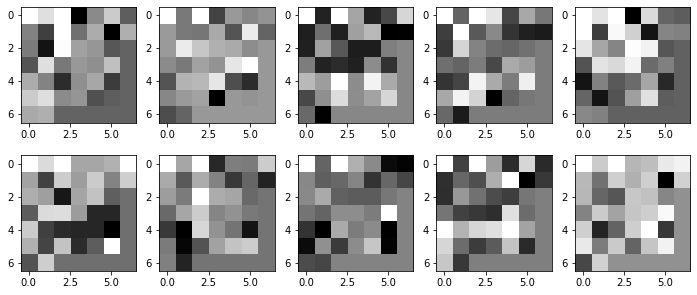

In [3]:
with open(os.path.join('data', 'images.npy'), 'rb') as f:
    images = np.load(f)
    
print('Shape:', images.shape)
show_images(images[:10], n_row=2, n_col=5, figsize=[12,5])

In [4]:
images[0]

array([[        nan,  1.5703558 ,         nan, -1.2451949 ,  0.49905556,
         1.3178105 , -0.06774464],
       [ 0.39030746, -0.45131898,  1.9827619 ,  0.17150028,  0.93099517,
        -1.2591714 ,  0.9594523 ],
       [ 0.3067738 , -1.0068446 ,  1.9508051 ,  0.79218   ,  0.6524795 ,
        -0.15706706,  0.        ],
       [-0.18647993,  1.5703558 ,  0.2671111 ,  0.67461216,  0.56122994,
         1.1814929 ,  0.        ],
       [ 0.9310344 ,  0.40289903, -0.67810786,  0.56122994,  0.8562322 ,
        -0.49127442,  0.        ],
       [ 1.3178105 ,  1.5533768 ,  0.5113582 ,  0.6360072 , -0.23886596,
        -0.06774464,  0.        ],
       [ 0.8882667 ,  0.9594523 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]], dtype=float32)

## Data Exploration & Preparation

### 1. Descriptive Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61305 entries, 0 to 61304
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2728 non-null   object 
 1   V1      61305 non-null  object 
 2   V2      61305 non-null  object 
 3   V3      61305 non-null  object 
 4   V4      61298 non-null  object 
 5   V5      61305 non-null  object 
 6   V6      61288 non-null  float64
 7   V7      61288 non-null  float64
 8   V8      61288 non-null  float64
 9   V9      61288 non-null  float64
 10  V10     61288 non-null  float64
 11  V11     61042 non-null  float64
 12  V12     61042 non-null  float64
 13  V13     61042 non-null  float64
 14  V14     61042 non-null  float64
 15  V15     61305 non-null  object 
 16  V16     61305 non-null  object 
 17  V17     61301 non-null  object 
 18  V18     2728 non-null   object 
 19  V19     61305 non-null  float64
 20  V20     61305 non-null  float64
 21  V21     61301 non-null  object 
 22

In [6]:
df.columns

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39',
       'target'],
      dtype='object')

### 2. Detection and Handling of Missing Values

In [7]:
df.isnull().sum()

V0        58577
V1            0
V2            0
V3            0
V4            7
V5            0
V6           17
V7           17
V8           17
V9           17
V10          17
V11         263
V12         263
V13         263
V14         263
V15           0
V16           0
V17           4
V18       58577
V19           0
V20           0
V21           4
V22           7
V23           4
V24           8
V25        1904
V26           0
V27           0
V28          56
V29           0
V30           0
V31           0
V32           0
V33           0
V34           0
V35        2593
V36        2588
V37           0
V38           0
V39           0
target        0
dtype: int64

In [8]:
#handeling Nan values in images
processed_dataset = np.nan_to_num(images, nan=0, posinf=1, neginf=0)
processed_dataset[0]

array([[ 0.        ,  1.5703558 ,  0.        , -1.2451949 ,  0.49905556,
         1.3178105 , -0.06774464],
       [ 0.39030746, -0.45131898,  1.9827619 ,  0.17150028,  0.93099517,
        -1.2591714 ,  0.9594523 ],
       [ 0.3067738 , -1.0068446 ,  1.9508051 ,  0.79218   ,  0.6524795 ,
        -0.15706706,  0.        ],
       [-0.18647993,  1.5703558 ,  0.2671111 ,  0.67461216,  0.56122994,
         1.1814929 ,  0.        ],
       [ 0.9310344 ,  0.40289903, -0.67810786,  0.56122994,  0.8562322 ,
        -0.49127442,  0.        ],
       [ 1.3178105 ,  1.5533768 ,  0.5113582 ,  0.6360072 , -0.23886596,
        -0.06774464,  0.        ],
       [ 0.8882667 ,  0.9594523 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [9]:
# dropping columns with large nan values because replacing them with any value will make columns static
df2 = df.drop(['V0', 'V18'], axis = 1)
df2 = df2.fillna(df2.median())
df2.isnull().sum()

C:\Users\usman jalil\AppData\Local\Temp\ipykernel_24612\2818613490.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = df2.fillna(df2.median())


V1           0
V2           0
V3           0
V4           7
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          4
V19          0
V20          0
V21          4
V22          7
V23          4
V24          8
V25       1904
V26          0
V27          0
V28          0
V29          0
V30          0
V31          0
V32          0
V33          0
V34          0
V35       2593
V36       2588
V37          0
V38          0
V39          0
target       0
dtype: int64

In [10]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,target
0,C1,C1,C61,C2,C0,593467.0,36804.0,473651.0,763304.0,475018.0,...,156574.0,327088.0,420.0,149982.0,C1,C2,C6,846,148,0
1,C1,C1,C35,C2,C0,502611.0,29428.0,256499.0,413448.0,239103.0,...,156340.0,326602.0,564.0,67182.0,C0,C1,C5,866,-1154,0
2,C2,C2,C42,C2,C0,130495.0,9828.0,80063.0,129190.0,85635.0,...,156106.0,326116.0,780.0,231402.0,C1,C2,C9,688,1513,0
3,C1,C1,C46,C12,C0,357881.0,22844.0,268379.0,432588.0,240843.0,...,156262.0,326440.0,708.0,112906.0,C0,C1,C8,804,2647,0
4,C1,C1,C56,C2,C0,789119.0,49184.0,482255.0,777166.0,464491.0,...,156496.0,326926.0,492.0,149982.0,C0,C1,C4,800,-146,0


### 3. Detection and Handling of Outliers

In [11]:
# Calculate IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove rows that contain outliers
df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

df2.head()

C:\Users\usman jalil\AppData\Local\Temp\ipykernel_24612\2091187906.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,target
0,C1,C1,C61,C2,C0,593467.0,36804.0,473651.0,763304.0,475018.0,...,156574.0,327088.0,420.0,149982.0,C1,C2,C6,846,148,0
1,C1,C1,C35,C2,C0,502611.0,29428.0,256499.0,413448.0,239103.0,...,156340.0,326602.0,564.0,67182.0,C0,C1,C5,866,-1154,0
2,C2,C2,C42,C2,C0,130495.0,9828.0,80063.0,129190.0,85635.0,...,156106.0,326116.0,780.0,231402.0,C1,C2,C9,688,1513,0
3,C1,C1,C46,C12,C0,357881.0,22844.0,268379.0,432588.0,240843.0,...,156262.0,326440.0,708.0,112906.0,C0,C1,C8,804,2647,0
4,C1,C1,C56,C2,C0,789119.0,49184.0,482255.0,777166.0,464491.0,...,156496.0,326926.0,492.0,149982.0,C0,C1,C4,800,-146,0


### 4. Detection and Handling of Class Imbalance

In [12]:
num_samples = int(len(df2) * 0.45)
sample_indices = np.random.choice(df2.index, size=num_samples, replace=False)
df2.loc[sample_indices, 'target'] = 1

In [13]:
class_dist = df2['target'].value_counts()
class_dist

0    28288
1    23144
Name: target, dtype: int64

### 5. Understanding Relationship Between Variables

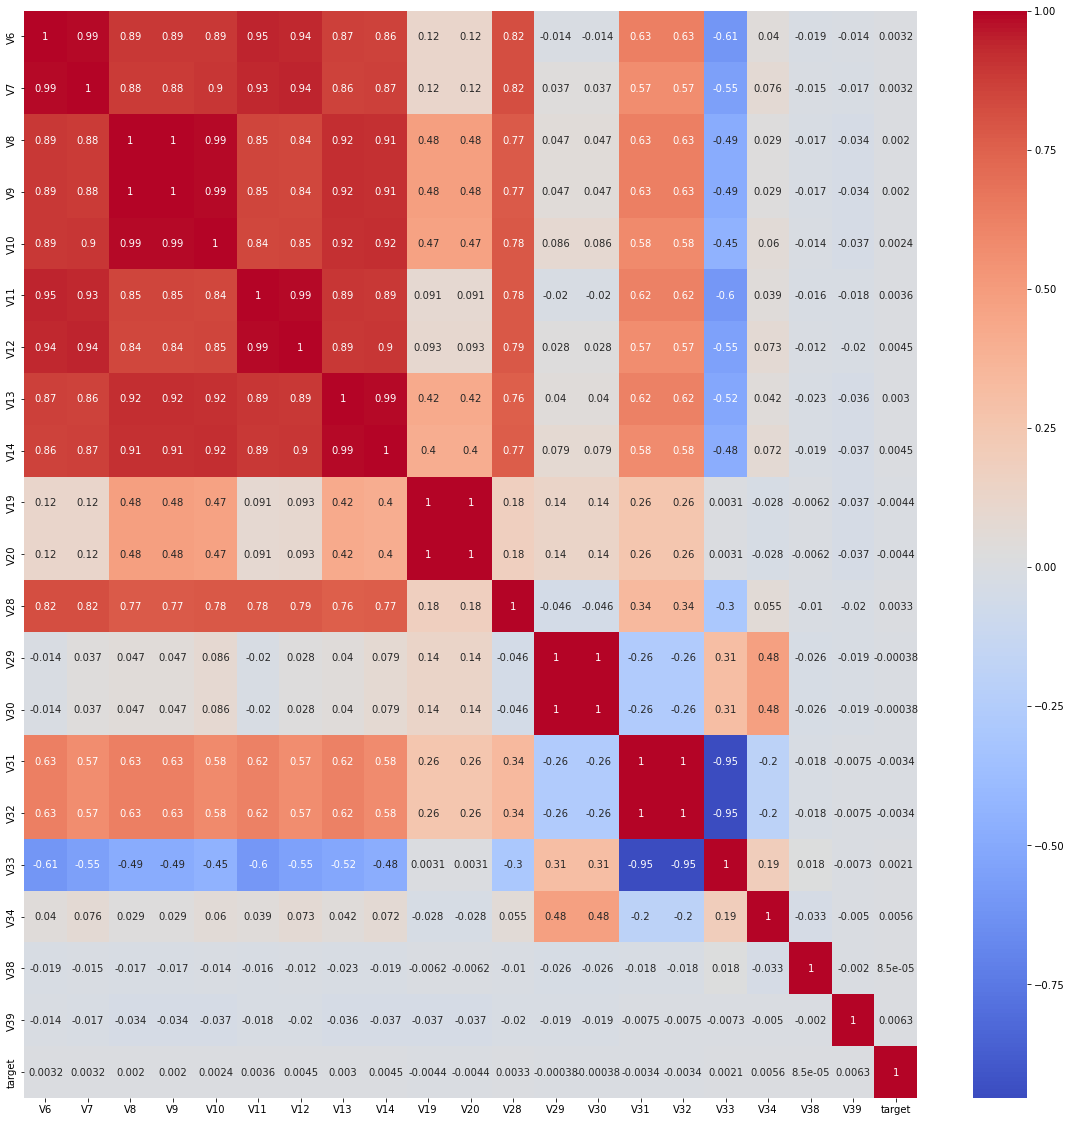

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df2.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

### 6. Data Visualization

In [15]:
# Visualization is not much necessary as purpose of outlier removal is already done perfectly

## Data Preprocessing

### 7. General Preprocessing

In [16]:
# general pre-processing is already done

### 8. Feature Selection

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### 9. Feature Engineering

In [18]:
x = df2.drop('target', axis  = 1)
y = df2['target']
x_encoded = pd.get_dummies(x)

In [19]:
x_encoded.head()

,V6,V7,V8,V9,V10,V11,V12,V13,V14,V19,...,V37_C0,V37_C1,V37_C2,V37_C3,V37_C4,V37_C5,V37_C6,V37_C7,V37_C8,V37_C9
0,593467.0,36804.0,473651.0,763304.0,475018.0,642970.0,721206.0,738800.0,946785.0,6.431184e+09,...,0,0,0,0,0,0,1,0,0,0
1,502611.0,29428.0,256499.0,413448.0,239103.0,584735.0,643428.0,661450.0,847377.0,6.289056e+09,...,0,0,0,0,0,1,0,0,0,0
2,130495.0,9828.0,80063.0,129190.0,85635.0,151155.0,197988.0,155280.0,224481.0,6.207408e+09,...,0,0,0,0,0,0,0,0,0,1
3,357881.0,22844.0,268379.0,432588.0,240843.0,376780.0,454899.0,543500.0,711337.0,6.367248e+09,...,0,0,0,0,0,0,0,0,1,0
4,789119.0,49184.0,482255.0,777166.0,464491.0,945545.0,1099308.0,998570.0,1259677.0,6.316272e+09,...,0,0,0,0,1,0,0,0,0,0


## Modeling & Evaluation

### 10. Creating models

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

class Model:
    def __init__(self, n_estimators=100, random_state=42):
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.model = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state)
        
    def Fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def score(self, X, y):
        y_pred = self.model.predict(X)
        return f1_score(y, y_pred)

### 11. Model Evaluation

In [21]:
from sklearn.model_selection import train_test_split

# assume X is the feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print("F1 Score is {0:.2f}".format(f1_score(y_train, y_pred)))

F1 Score is 0.97


### 12. Hyperparameters Search

In [ ]:
# obtained much better f1 score so no-need